Van der Pool Oscillator是一种具有非线性阻尼的非保守震荡系统。其二阶微分方程为

$$\frac{d^2 x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$

其中$x(t)$为位置坐标，$\mu$是表示非线性和阻尼强度的标量参数。

①当$\mu=0$，即不存在阻尼函数时，方程变为

$$\frac{d^2 x}{dt^2}+x=0$$

此时为简谐振动的运动方程。

②当$\mu>0$时，对于所有的初始条件，最终均会收敛为唯一的极限环。

此时微分方程可以写成以下形式：

$$ \left \{
    \begin{aligned}
    &\frac{d^2 x}{dt^2}+f(x)\frac{dx}{dt}+g(x)=0\\
    \\
    &f(x)=-\mu(1-x^2)\\
    &g(x)=x\\
    \end{aligned}
    \right.$$

定义$F(x):=\int_{0}^{x} f(\xi) d\xi=\mu(\frac{1}{3}x^3-x)$

由于

1.对于$x>0$均有$g(x)>0$

2.$\displaystyle\lim_{x \to \infty}\int_{0}^{x}F(x):=\displaystyle\lim_{x \to \infty}\int_{0}^{x} f(\xi) d\xi =\displaystyle\lim_{x \to \infty}\left.\mu(\frac{1}{3}\xi^3-\xi)\right|_0^x$

3.显然在$x>0$时$F(x)=0$有唯一实根$x=\sqrt{3}$，且在$0<x<\sqrt{3}$时$F(x)<0$,$x>\sqrt{3}$时$F(x)>0$

由Liénard定理可知当$\mu>0$时，Van der Pool Oscillator存在一个极限环。

接下来计算振动周期。对于$\mu \rightarrow 0$，可以利用Poincaré–Lindstedt Method进行近似求解。

令$\tau=\omega t,\omega=1+\mu\omega_1+\mu^2\omega_2+O(\mu^3)$，代入

$$\omega^2\ddot{x}-\omega\mu(1-x^2)\dot{x}+x=0$$

得到

$$ \left \{
    \begin{aligned}
    &\ddot{x_0}+x_0=0\\
    &\ddot{x_1}+x_1+2\omega_1\ddot{x_0}+(x_0^2-1)\dot{x_0}=0\\
    &\ddot{x_2}+x_2+(\omega_1^2+2\omega_2)\ddot{x_0}+2\omega_1\ddot{x_1}+2x_0x_1\dot{x_0}+\omega_1(x_0^2-1)\dot{x_0}+\dot{x_1}(x_0^2-1)=0\\
    \end{aligned}
    \right.$$

对于第一个方程，一般解为$x_0=Acos(\tau+\phi)$，取$\phi=0$，然后带入第二个方程，得到

$$\ddot{x_1}+x_1+(A-\frac{A^3}{4})\sin\tau-2\omega_1A\cos\tau-\frac{A^3}{4}\sin(3\tau)=0$$

需要满足

$$ \left \{
    \begin{aligned}
    &A=\frac{A^3}{4}\\
    &2\omega_1A=0
    \end{aligned}
    \right.$$

即可得到$A=2,\omega_1=0$

对于方程$\ddot{x_1}+x_1=2\sin(3\tau)$，其通解为$x_1=B\cos(\tau+\phi)-\frac{1}{4}\sin(3\tau)$。而$x_1$与$x_0$无关，因此取$x_1=-\frac{1}{4}\sin(3\tau)$

同理可以得到$\omega_2=-\frac{1}{16}$，因此我们发现$\omega=1-\frac{1}{16}\mu^2+O(\mu^3)$

如果提高计算精度，可以得到$\omega=1-\frac{1}{16}\mu^2+\frac{17}{3072}\mu^4+O(\mu^6)$，振动周期$T=\frac{2\pi}{\omega}$。



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

# 定义van der Pol oscillator的微分方程
def vdp(t, y, μ):
    x, dx_dt = y
    dy_dt = [dx_dt, μ * (1 - x**2) * dx_dt - x]
    return dy_dt

# 定义计算周期的函数
def calculate_period(time, signal):
    peaks, _ = find_peaks(signal)
    periods = np.diff(time[peaks])
    avg_period = np.mean(periods)
    return avg_period

# 相空间图绘制
def plot_phase_space(x, dx_dt):
    plt.figure()
    plt.plot(x, dx_dt)
    plt.xlabel('x')
    plt.ylabel('dx/dt')
    plt.title('Phase Space')
    plt.grid(True)
    plt.show()

# 相空间图绘制
def plot_t_x(time, x):
    plt.figure()
    plt.plot(time, x)
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('t-x Diagram')
    plt.grid(True)
    plt.show()


#定义解vdp函数并得到极限环
def solvevdp(μ, t_start, t_end, num_points, initial_conditions):
    #initial_conditions=[x(0), dx/dt(0)]
    x_list = []
    dx_dt_list = []
    solution = solve_ivp(lambda t, y: vdp(t, y, μ),
                     [t_start, t_end],
                     initial_conditions,
                     t_eval=np.linspace(t_start, t_end, num_points))
    
    x = solution.y[0]
    dx_dt = solution.y[1]
    start_index = int(num_points * 0.2)  # 从轨迹的 20% 处开始
    x = x[start_index:]
    dx_dt = dx_dt[start_index:]
    x_list.append(x)
    dx_dt_list.append(dx_dt)

    return x_list, dx_dt_list

Van der Pol oscillator的周期为: 6.6652782340741


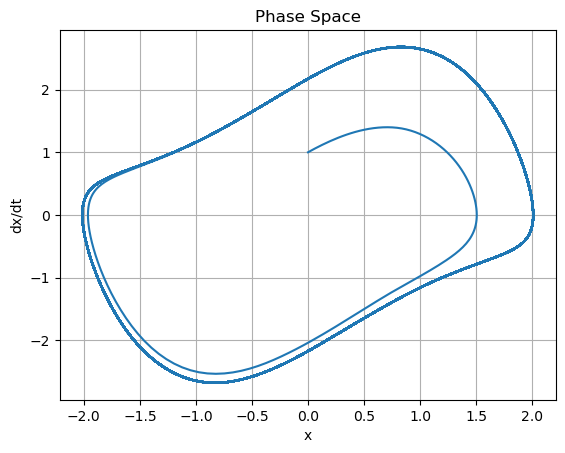

In [3]:
#计算μ = 1.0时的周期
initial_conditions = [0, 1]  # x(0), dx/dt(0)
μ = 1.0
t_start = 0.0
t_end = 3000.0
num_points = 100000

solution = solve_ivp(lambda t, y: vdp(t, y, μ),
                    [t_start, t_end],
                    initial_conditions,
                    t_eval=np.linspace(t_start, t_end, num_points))

time = solution.t
x = solution.y[0]
dx_dt = solution.y[1]

period = calculate_period(time, x)
print("Van der Pol oscillator的周期为:", period)

plot_phase_space(x, dx_dt)



上面计算了$\mu=1$时的振动周期，其近似计算值为
$$T=\frac{2\pi}{\omega}=\frac{2\pi}{1-\frac{1}{16}\mu^2+\frac{17}{3072}\mu^4+O(\mu^6)}=6.6627$$
与程序结果吻合。

当$\mu$增大时，振动周期的近似计算结果为
$$T=(3-2\ln2)\mu$$



Van der Pol oscillator的周期为: 160.52399385732716


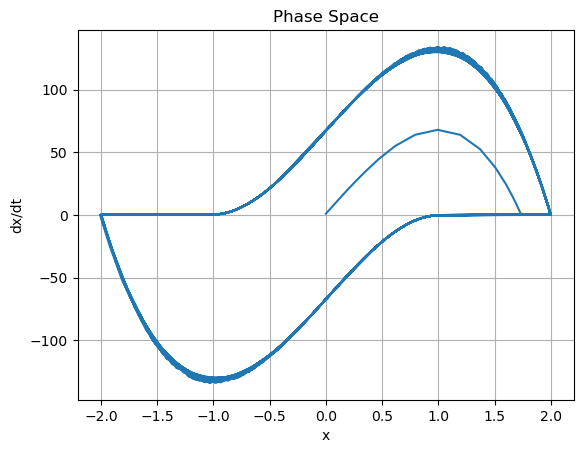

In [4]:
#计算μ = 100.0时的周期
initial_conditions = [0, 1] 
μ = 100.0
t_start = 0.0
t_end = 3000.0
num_points = 1000000

solution = solve_ivp(lambda t, y: vdp(t, y, μ),
                    [t_start, t_end],
                    initial_conditions,
                    t_eval=np.linspace(t_start, t_end, num_points))

time = solution.t
x = solution.y[0]
dx_dt = solution.y[1]

period = calculate_period(time, x)
print("Van der Pol oscillator的周期为:", period)

plot_phase_space(x, dx_dt)

上面计算了$\mu=100$时的振动周期，其近似计算值为
$$T=100(3-2\ln2)=161.3706$$
与程序结果吻合。



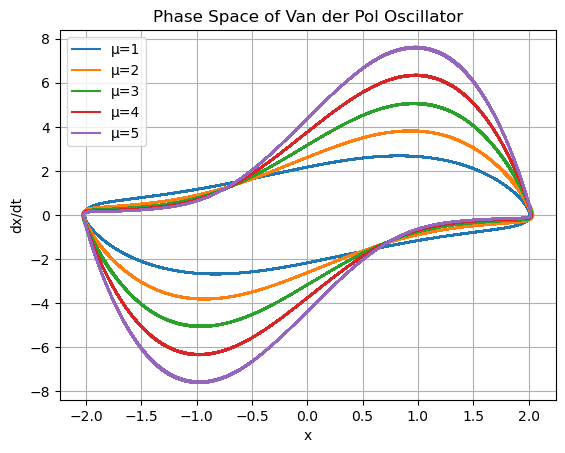

In [5]:
# 绘制μ = 1 to 5的相空间图
fig, ax = plt.subplots()

for μ in range(1, 6):
    x, dx_dt = solvevdp(μ, 0, 3000, 100000, [1.0, 0.0])
    ax.plot(x[0], dx_dt[0], label=f'μ={μ}')

ax.set_title('Phase Space of Van der Pol Oscillator')
ax.set_xlabel('x')
ax.set_ylabel('dx/dt')
ax.legend()
ax.grid(True)
plt.show()


从上图可以看出随着$\mu$的增大，振动的振幅几乎不变，而速率的最大值越来越大，相空间图也越来越尖锐；同时也可以得知Van der Pool Oscillator的振幅与$\mu$几乎无关。

③当$\mu<0$时，Van der Pool Oscillator表现出与$\mu>0$不同的运动状态。将$$\frac{d^2 x}{dt^2}-\mu(1-x^2)\frac{dx}{dt}+x=0$$写成以下形式

$$ \left \{
    \begin{aligned}
    &\frac{dx}{dt}=v\\
    &\frac{dv}{dt}=\mu(1-x^2)v-x\\
    \end{aligned}
    \right.$$

将系统的状态用向量$\vec{r}=(x,v)$进行描述，
可以看到当系统处于稳定状态时，即$\frac{d\vec{r}}{dt}=0$，满足
$$ \left \{
    \begin{aligned}
    &v=0\\
    &x=0\\
    \end{aligned}
    \right.$$

即无论什么初始情况最终都会趋向静止。

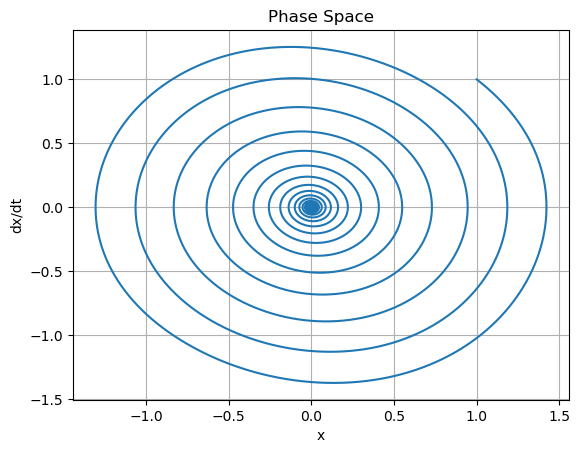

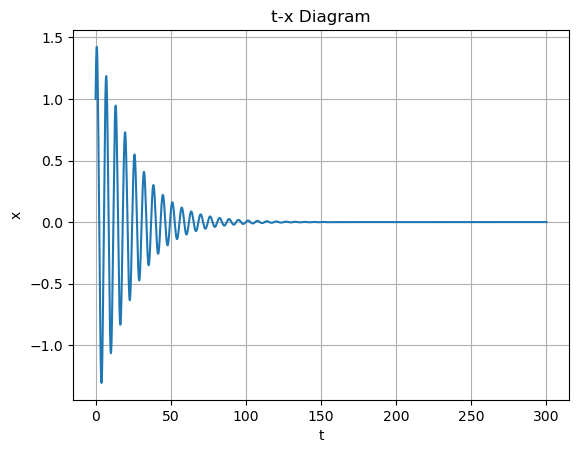

In [4]:
initial_conditions = [1 ,1]  # x(0), dx/dt(0)
μ = -0.1
t_start = 0.0
t_end = 300.0
num_points = 1000000

solution = solve_ivp(lambda t, y: vdp(t, y, μ),
                    [t_start, t_end],
                    initial_conditions,
                    t_eval=np.linspace(t_start, t_end, num_points))

time = solution.t
x = solution.y[0]
dx_dt = solution.y[1]



plot_phase_space(x , dx_dt)
plot_t_x(time , x)
